Ejercicio Prectico Clase 2:

Grupo: 8
Integrantes:

•	Ivan Vega.
•	Danny Sagal.
•	Dylan Pérez.


1) Al audio correspondiente a su voz con ruido blanco, realice una comparación entre filtros IIR y FIR para encontrar al mejor filtro pasa banda. Consulte alguna métrica que le permita tomar la decisión. Debe al menos probar 4 filtros diferentes de los dos tipos.

In [2]:
from scipy.io import wavfile as waves
from IPython.display import Audio
import scipy.fftpack as fourier
import pyaudio as pa   # por instalar
import numpy as np
import matplotlib.pyplot as plt
import wave
 
# --- CONFIGURACIÓN ---
FRAMES = 1024       # resolucion sonido
FORMAT = pa.paInt16  # enteros de 16 bits
CHANNELS = 1    
Fs = 44100
segundos = 5
 
filename = 'C:/MAESTRIA/grabacion_2.wav'
 
 
p = pa.PyAudio()
 
print("Inicio de grabacion")
 
 
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate = Fs,
    input= True,
    frames_per_buffer= FRAMES
)
 
frames_totales = []
 
# Calculamos cuántos paquetes leer para completar 5 segundos
for i in range(0, int(Fs / FRAMES * segundos)):
    data = stream.read(FRAMES)
    frames_totales.append(data)
 
print("Grabación finalizada.")
 
# Detener y cerrar stream
stream.stop_stream()
stream.close()
p.terminate()
 
# --- GUARDAR ARCHIVO .WAV ---
wf = wave.open(filename, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(Fs)
wf.writeframes(b''.join(frames_totales))
wf.close()
print(f"Archivo guardado como: {filename}")

Inicio de grabacion
Grabación finalizada.
Archivo guardado como: C:/MAESTRIA/grabacion_2.wav


EJECUCION FILTRO IIR BUTTERWORTH


✅ Archivo exportado exitosamente como: C:/MAESTRIA/prueba_filtro_IIR.wav


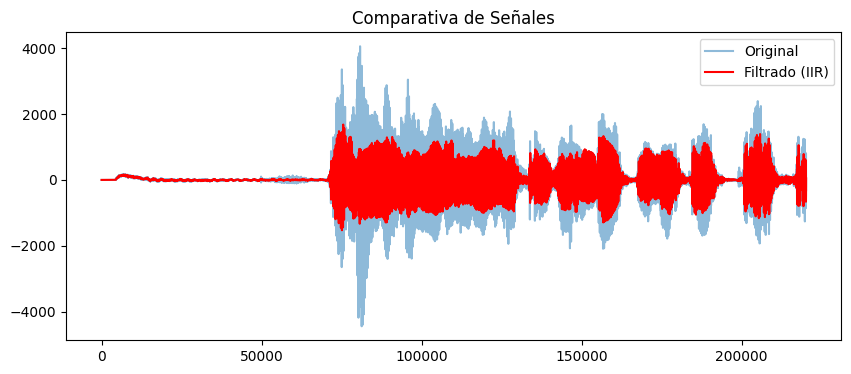

In [4]:

import numpy as np
import scipy.fftpack as fourier
from scipy.io import wavfile as waves
from scipy.signal import butter, lfilter
from IPython.display import Audio, display
import matplotlib.pyplot as plt

# 1. CARGA DEL ARCHIVO ORIGINAL
filename = 'C:/MAESTRIA/grabacion_2.wav'
Fs, data = waves.read(filename)

# Convertir a mono si es necesario
Audio_m = data[:, 0] if len(data.shape) > 1 else data

# 2. DISEÑO Y APLICACIÓN DEL FILTRO IIR (Butterworth)
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Frecuencia de Nyquist
    normal_cutoff = cutoff / nyq
    # Coeficientes del filtro IIR
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

# Aplicamos el filtro
fc = 400
audio_filtrado = butter_lowpass_filter(Audio_m, cutoff=fc, fs=Fs, order=6)

# --- 3. EXPORTAR EL ARCHIVO ---
# Definimos el nombre solicitado
nombre_salida = 'C:/MAESTRIA/prueba_filtro_IIR.wav'

# IMPORTANTE: Normalización y conversión a 16 bits
# Escalamos los valores al rango [-32768, 32767]
audio_normalizado = audio_filtrado / np.max(np.abs(audio_filtrado))
audio_final_int16 = (audio_normalizado * 32767).astype(np.int16)

# Escritura del archivo
waves.write(nombre_salida, Fs, audio_final_int16)

print(f"✅ Archivo exportado exitosamente como: {nombre_salida}")

# --- 4. VISUALIZACIÓN ---
plt.figure(figsize=(10, 4))
plt.plot(Audio_m, label='Original', alpha=0.5)
plt.plot(audio_filtrado, label='Filtrado (IIR)', color='red')
plt.title("Comparativa de Señales")
plt.legend()
plt.show()

display(Audio(nombre_salida))

FILTRO IIR CHEBYSHEV TIPO 1

✅ Archivo Chebyshev Tipo 1 exportado como: C:/MAESTRIA/prueba_filtro_Cheby1.wav


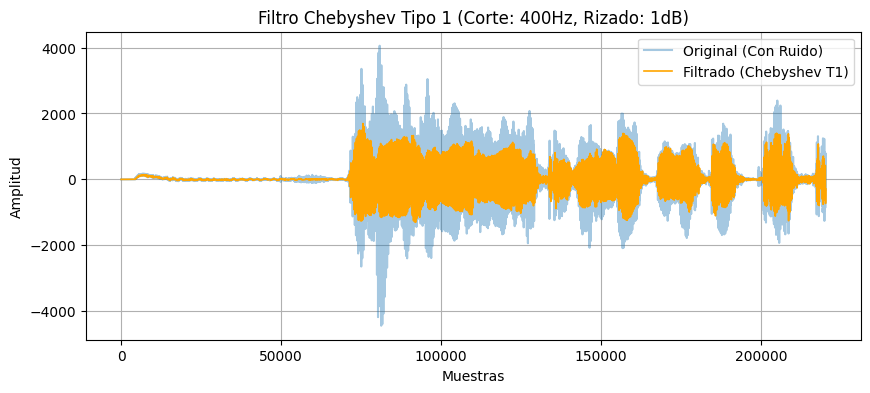

In [7]:
import numpy as np
import scipy.fftpack as fourier
from scipy.io import wavfile as waves
from scipy.signal import cheby1, lfilter
from IPython.display import Audio, display
import matplotlib.pyplot as plt

# 1. CARGA DEL ARCHIVO ORIGINAL
filename = 'C:/MAESTRIA/grabacion_2.wav'
Fs, data = waves.read(filename)

# Convertir a mono si es necesario
Audio_m = data[:, 0] if len(data.shape) > 1 else data

# 2. DISEÑO Y APLICACIÓN DEL FILTRO CHEBYSHEV TIPO 1
def cheby1_lowpass_filter(data, cutoff, fs, order=5, rp=1):
    """
    rp: Rizado máximo permitido en la banda de paso (en dB). 
    Un valor común es 1 dB o 0.5 dB.
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    
    # Coeficientes del filtro Chebyshev Tipo 1
    # b, a son los coeficientes del numerador y denominador
    b, a = cheby1(order, rp, normal_cutoff, btype='low', analog=False)
    
    y = lfilter(b, a, data)
    return y

# Aplicamos el filtro
fc = 400
# Usamos un rizado de 1dB para notar el efecto en el corte
audio_filtrado = cheby1_lowpass_filter(Audio_m, cutoff=fc, fs=Fs, order=6, rp=1)

# --- 3. EXPORTAR EL ARCHIVO ---
nombre_salida = 'C:/MAESTRIA/prueba_filtro_Cheby1.wav'

# Normalización y conversión a 16 bits
peak = np.max(np.abs(audio_filtrado))
audio_final_int16 = (audio_filtrado / peak * 32767).astype(np.int16)

waves.write(nombre_salida, Fs, audio_final_int16)

print(f"✅ Archivo Chebyshev Tipo 1 exportado como: {nombre_salida}")

# --- 4. VISUALIZACIÓN ---
plt.figure(figsize=(10, 4))
plt.plot(Audio_m, label='Original (Con Ruido)', alpha=0.4)
plt.plot(audio_filtrado, label='Filtrado (Chebyshev T1)', color='orange', linewidth=1.2)
plt.title(f"Filtro Chebyshev Tipo 1 (Corte: {fc}Hz, Rizado: 1dB)")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

display(Audio(nombre_salida))

FILTRO IIR CHEBYSHEV TIPO II

✅ Archivo Chebyshev Tipo II exportado como: C:/MAESTRIA/prueba_filtro_Cheby2.wav


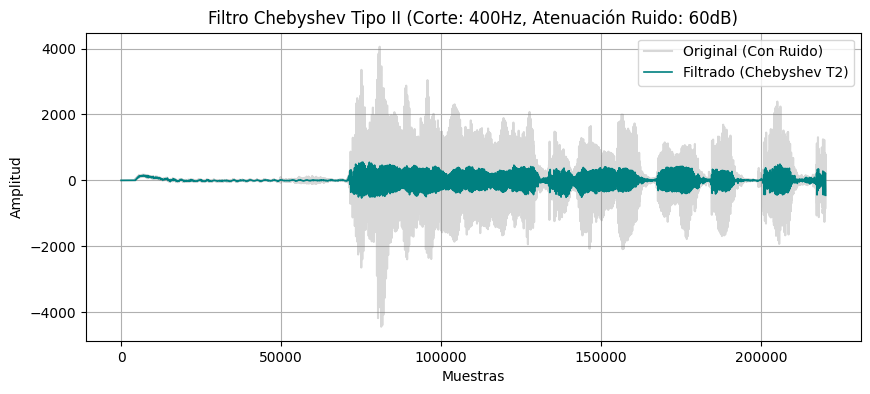

In [8]:
import numpy as np
import scipy.fftpack as fourier
from scipy.io import wavfile as waves
from scipy.signal import cheby2, lfilter
from IPython.display import Audio, display
import matplotlib.pyplot as plt

# 1. CARGA DEL ARCHIVO ORIGINAL
filename = 'C:/MAESTRIA/grabacion_2.wav'
Fs, data = waves.read(filename)

# Convertir a mono si es necesario
Audio_m = data[:, 0] if len(data.shape) > 1 else data

# 2. DISEÑO Y APLICACIÓN DEL FILTRO CHEBYSHEV TIPO II
def cheby2_lowpass_filter(data, cutoff, fs, order=5, rs=40):
    """
    rs: Atenuación mínima en la banda de rechazo (en dB). 
    40 dB es un valor estándar que reduce el ruido 100 veces en amplitud.
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    
    # Coeficientes del filtro Chebyshev Tipo II
    # b, a son los coeficientes del numerador y denominador
    b, a = cheby2(order, rs, normal_cutoff, btype='low', analog=False)
    
    y = lfilter(b, a, data)
    return y

# Aplicamos el filtro
fc = 400
# rs=60 significa que queremos que el ruido se atenúe 60dB (muy fuerte)
audio_filtrado = cheby2_lowpass_filter(Audio_m, cutoff=fc, fs=Fs, order=6, rs=60)

# --- 3. EXPORTAR EL ARCHIVO ---
nombre_salida = 'C:/MAESTRIA/prueba_filtro_Cheby2.wav'

# Normalización y conversión a 16 bits
peak = np.max(np.abs(audio_filtrado))
if peak > 0:
    audio_final_int16 = (audio_filtrado / peak * 32767).astype(np.int16)
else:
    audio_final_int16 = audio_filtrado.astype(np.int16)

waves.write(nombre_salida, Fs, audio_final_int16)

print(f"✅ Archivo Chebyshev Tipo II exportado como: {nombre_salida}")

# --- 4. VISUALIZACIÓN ---
plt.figure(figsize=(10, 4))
plt.plot(Audio_m, label='Original (Con Ruido)', alpha=0.3, color='gray')
plt.plot(audio_filtrado, label='Filtrado (Chebyshev T2)', color='teal', linewidth=1.2)
plt.title(f"Filtro Chebyshev Tipo II (Corte: {fc}Hz, Atenuación Ruido: 60dB)")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

display(Audio(nombre_salida))

FILTRO IIR TIPO ELIPTICO

✅ Archivo Elíptico exportado como: C:/MAESTRIA/prueba_filtro_Eliptico.wav


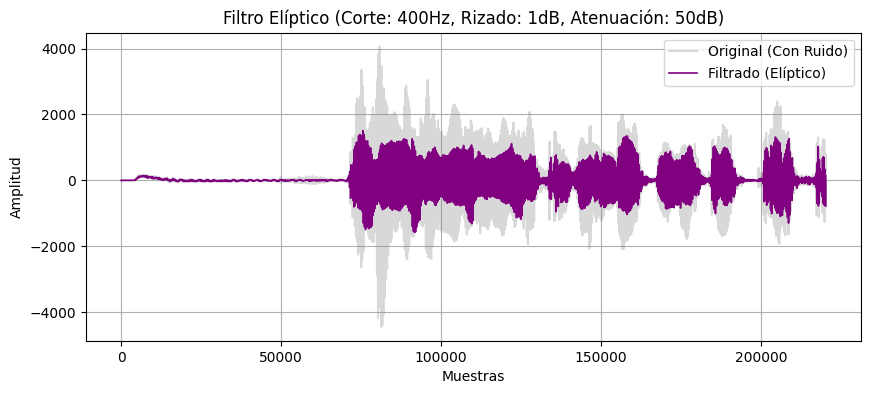

In [9]:
import numpy as np
import scipy.fftpack as fourier
from scipy.io import wavfile as waves
from scipy.signal import ellip, lfilter
from IPython.display import Audio, display
import matplotlib.pyplot as plt

# 1. CARGA DEL ARCHIVO ORIGINAL
filename = 'C:/MAESTRIA/grabacion_2.wav'
Fs, data = waves.read(filename)

# Convertir a mono si es necesario
Audio_m = data[:, 0] if len(data.shape) > 1 else data

# 2. DISEÑO Y APLICACIÓN DEL FILTRO ELÍPTICO
def ellip_lowpass_filter(data, cutoff, fs, order=5, rp=1, rs=40):
    """
    rp: Rizado máximo en la banda de paso (dB).
    rs: Atenuación mínima en la banda de rechazo (dB).
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    
    # Coeficientes del filtro Elíptico
    # b, a son los coeficientes del numerador y denominador
    b, a = ellip(order, rp, rs, normal_cutoff, btype='low', analog=False)
    
    y = lfilter(b, a, data)
    return y

# Aplicamos el filtro
fc = 400
# rp=1 (rizado en voz), rs=50 (atenuación de ruido muy fuerte)
audio_filtrado = ellip_lowpass_filter(Audio_m, cutoff=fc, fs=Fs, order=6, rp=1, rs=50)

# --- 3. EXPORTAR EL ARCHIVO ---
nombre_salida = 'C:/MAESTRIA/prueba_filtro_Eliptico.wav'

# Normalización y conversión a 16 bits
peak = np.max(np.abs(audio_filtrado))
if peak > 0:
    audio_final_int16 = (audio_filtrado / peak * 32767).astype(np.int16)
else:
    audio_final_int16 = audio_filtrado.astype(np.int16)

waves.write(nombre_salida, Fs, audio_final_int16)

print(f"✅ Archivo Elíptico exportado como: {nombre_salida}")

# --- 4. VISUALIZACIÓN ---
plt.figure(figsize=(10, 4))
plt.plot(Audio_m, label='Original (Con Ruido)', alpha=0.3, color='gray')
plt.plot(audio_filtrado, label='Filtrado (Elíptico)', color='purple', linewidth=1.2)
plt.title(f"Filtro Elíptico (Corte: {fc}Hz, Rizado: 1dB, Atenuación: 50dB)")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

display(Audio(nombre_salida))

EJECUCION FILTRO FIR

FILTRO FIR PASO BAJO

✅ Archivo FIR exportado exitosamente en: C:/MAESTRIA/prueba_filtro_FIR.wav


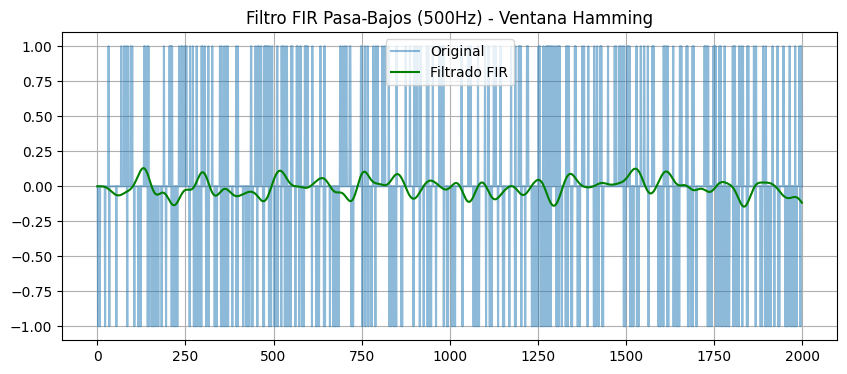

In [5]:
import numpy as np
import scipy.fftpack as fourier
from scipy.io import wavfile as waves
from scipy.signal import firwin, lfilter
from IPython.display import Audio, display
import matplotlib.pyplot as plt

# 1. CARGA DE DATOS
filename = 'C:/MAESTRIA/grabacion_2.wav'  # Asegúrate de que la ruta sea correcta
Fs, data = waves.read(filename)

# Normalización inicial y conversión a mono
if len(data.shape) > 1:
    data_norm = data[:, 0]
else:
    data_norm = data

# --- 2. DEFINICIÓN DEL FILTRO FIR ---
def fir_lowpass(fc, fs, ntaps=101):
    nyq = 0.5 * fs
    # Genera los coeficientes usando una ventana de Hamming
    taps = firwin(ntaps, fc/nyq, pass_zero='lowpass', window='hamming')
    return taps

# Configuración del filtro
fc = 500  # Frecuencia de corte
taps = fir_lowpass(fc, Fs)

# Aplicar el filtro FIR
audio_filtrado_fir = lfilter(taps, 1.0, data_norm)

# --- 3. PROCESAMIENTO DE FRECUENCIA (Opcional para ver resultados) ---
fft_filtrada = np.fft.fft(audio_filtrado_fir)

# --- 4. ESCALAR A 16 BITS Y EXPORTAR ---
peak = np.max(np.abs(audio_filtrado_fir))

if peak > 0:
    audio_final = (audio_filtrado_fir / peak * 32767).astype(np.int16)
else:
    audio_final = audio_filtrado_fir.astype(np.int16)

# Definir rutas de salida
ruta_fir = 'C:/MAESTRIA/prueba_filtro_FIR.wav'
# También guardamos en la ruta específica de tu práctica si lo prefieres:
# ruta_practica = '/home/paul/Documentos/Personal/UIDE/MATERIAS/Semana 2/PRACTICAS/Data/fir_lp_500.wav'

waves.write(ruta_fir, Fs, audio_final)

print(f"✅ Archivo FIR exportado exitosamente en: {ruta_fir}")

# --- 5. VISUALIZACIÓN ---
plt.figure(figsize=(10, 4))
plt.plot(data_norm[:2000], label='Original', alpha=0.5)
plt.plot(audio_filtrado_fir[:2000], label='Filtrado FIR', color='green')
plt.title(f"Filtro FIR Pasa-Bajos ({fc}Hz) - Ventana Hamming")
plt.legend()
plt.grid(True)
plt.show()

display(Audio(ruta_fir))

FILTRO FIR TIPO PASA BANDA

✅ Archivo Paso Banda exportado en: C:/MAESTRIA/prueba_filtro_FIR_BP.wav


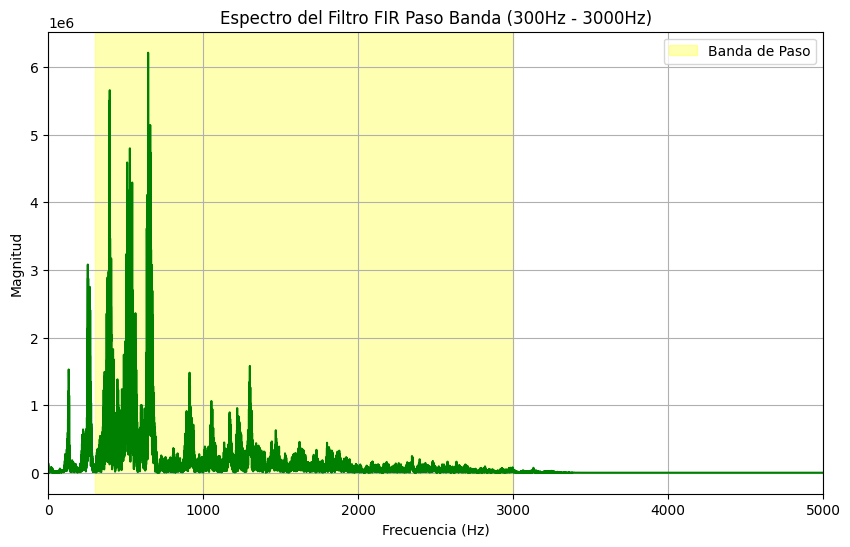

In [10]:
import numpy as np
import scipy.fftpack as fourier
from scipy.io import wavfile as waves
from scipy.signal import firwin, lfilter
from IPython.display import Audio, display
import matplotlib.pyplot as plt

# 1. CARGA DE DATOS
filename = 'C:/MAESTRIA/grabacion_2.wav'
Fs, data = waves.read(filename)

# Normalización inicial y conversión a mono
data_norm = data[:, 0] if len(data.shape) > 1 else data

# --- 2. DEFINICIÓN DEL FILTRO FIR PASO BANDA ---
def fir_bandpass(f_low, f_high, fs, ntaps=101):
    nyq = 0.5 * fs
    # Para Paso Banda, cutoff es una lista [f_inferior, f_superior]
    # pass_zero=False indica que es un filtro de banda (no pasa 0Hz)
    taps = firwin(ntaps, [f_low/nyq, f_high/nyq], pass_zero=False, window='hamming')
    return taps

# Configuración del rango de frecuencias (ejemplo: 300Hz a 3000Hz para voz)
f_inferior = 300
f_superior = 3000
taps = fir_bandpass(f_inferior, f_superior, Fs, ntaps=151) # Aumentamos taps para precisión

# Aplicar el filtro FIR
audio_filtrado_fir = lfilter(taps, 1.0, data_norm)

# --- 3. EXPORTAR EL ARCHIVO ---
ruta_fir_bp = 'C:/MAESTRIA/prueba_filtro_FIR_BP.wav'

# Escalar a 16 bits para evitar distorsión
peak = np.max(np.abs(audio_filtrado_fir))
if peak > 0:
    audio_final = (audio_filtrado_fir / peak * 32767).astype(np.int16)
else:
    audio_final = audio_filtrado_fir.astype(np.int16)

waves.write(ruta_fir_bp, Fs, audio_final)
print(f"✅ Archivo Paso Banda exportado en: {ruta_fir_bp}")

# --- 4. VISUALIZACIÓN ---
# Calculamos la FFT para ver el "hueco" que deja el filtro
L = len(audio_filtrado_fir)
freqs = Fs * np.arange(0, L // 2) / L
fft_res = np.abs(fourier.fft(audio_filtrado_fir))[0:L // 2]

plt.figure(figsize=(10, 6))

# Gráfica de Magnitud
plt.plot(freqs, fft_res, color='green')
plt.axvspan(f_inferior, f_superior, color='yellow', alpha=0.3, label='Banda de Paso')
plt.title(f"Espectro del Filtro FIR Paso Banda ({f_inferior}Hz - {f_superior}Hz)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 5000)
plt.legend()
plt.grid(True)
plt.show()

display(Audio(ruta_fir_bp))

FILTRO FIR PASO ALTO

✅ Archivo Paso Alto exportado en: C:/MAESTRIA/prueba_filtro_FIR_HP.wav


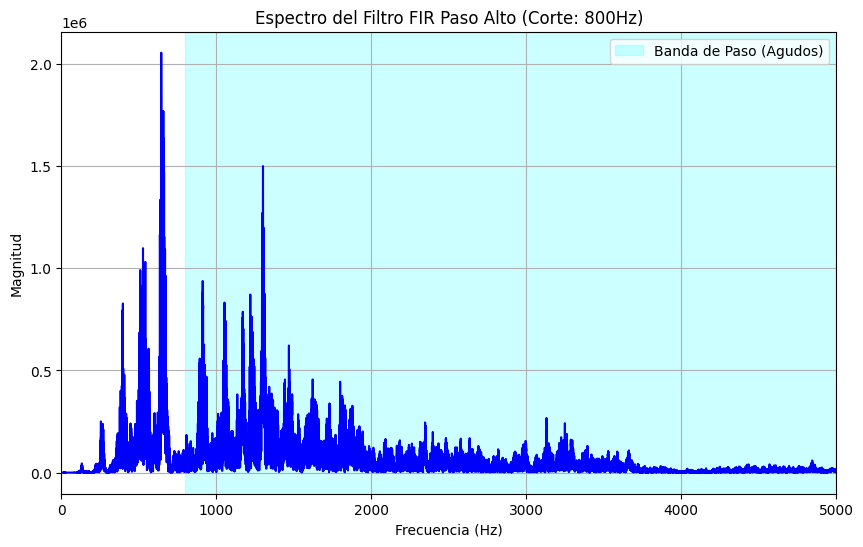

In [11]:
import numpy as np
import scipy.fftpack as fourier
from scipy.io import wavfile as waves
from scipy.signal import firwin, lfilter
from IPython.display import Audio, display
import matplotlib.pyplot as plt

# 1. CARGA DE DATOS
filename = 'C:/MAESTRIA/grabacion_2.wav'
Fs, data = waves.read(filename)

# Normalización inicial y conversión a mono
data_norm = data[:, 0] if len(data.shape) > 1 else data

# --- 2. DEFINICIÓN DEL FILTRO FIR PASO ALTO ---
def fir_highpass(fc, fs, ntaps=101):
    nyq = 0.5 * fs
    # pass_zero=False: Bloquea las frecuencias cercanas a 0 (bajas)
    # IMPORTANTE: ntaps debe ser impar para filtros paso alto
    taps = firwin(ntaps, fc/nyq, pass_zero=False, window='hamming')
    return taps

# Configuración: Eliminamos todo lo que esté por debajo de 800Hz
fc_alto = 800 
ntaps = 101 # Número impar
taps = fir_highpass(fc_alto, Fs, ntaps=ntaps)

# Aplicar el filtro FIR
audio_filtrado_fir = lfilter(taps, 1.0, data_norm)

# --- 3. EXPORTAR EL ARCHIVO ---
ruta_fir_hp = 'C:/MAESTRIA/prueba_filtro_FIR_HP.wav'

# Normalización a 16 bits
peak = np.max(np.abs(audio_filtrado_fir))
audio_final = (audio_filtrado_fir / peak * 32767).astype(np.int16) if peak > 0 else audio_filtrado_fir.astype(np.int16)

waves.write(ruta_fir_hp, Fs, audio_final)
print(f"✅ Archivo Paso Alto exportado en: {ruta_fir_hp}")

# --- 4. VISUALIZACIÓN ---
L = len(audio_filtrado_fir)
freqs = Fs * np.arange(0, L // 2) / L
fft_res = np.abs(fourier.fft(audio_filtrado_fir))[0:L // 2]



plt.figure(figsize=(10, 6))
plt.plot(freqs, fft_res, color='blue')
# Sombreado de la zona que dejamos pasar
plt.axvspan(fc_alto, Fs/2, color='cyan', alpha=0.2, label='Banda de Paso (Agudos)')
plt.title(f"Espectro del Filtro FIR Paso Alto (Corte: {fc_alto}Hz)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 5000)
plt.legend()
plt.grid(True)
plt.show()

display(Audio(ruta_fir_hp))

FILTRO FIR CON VENTANA DE HAMMING

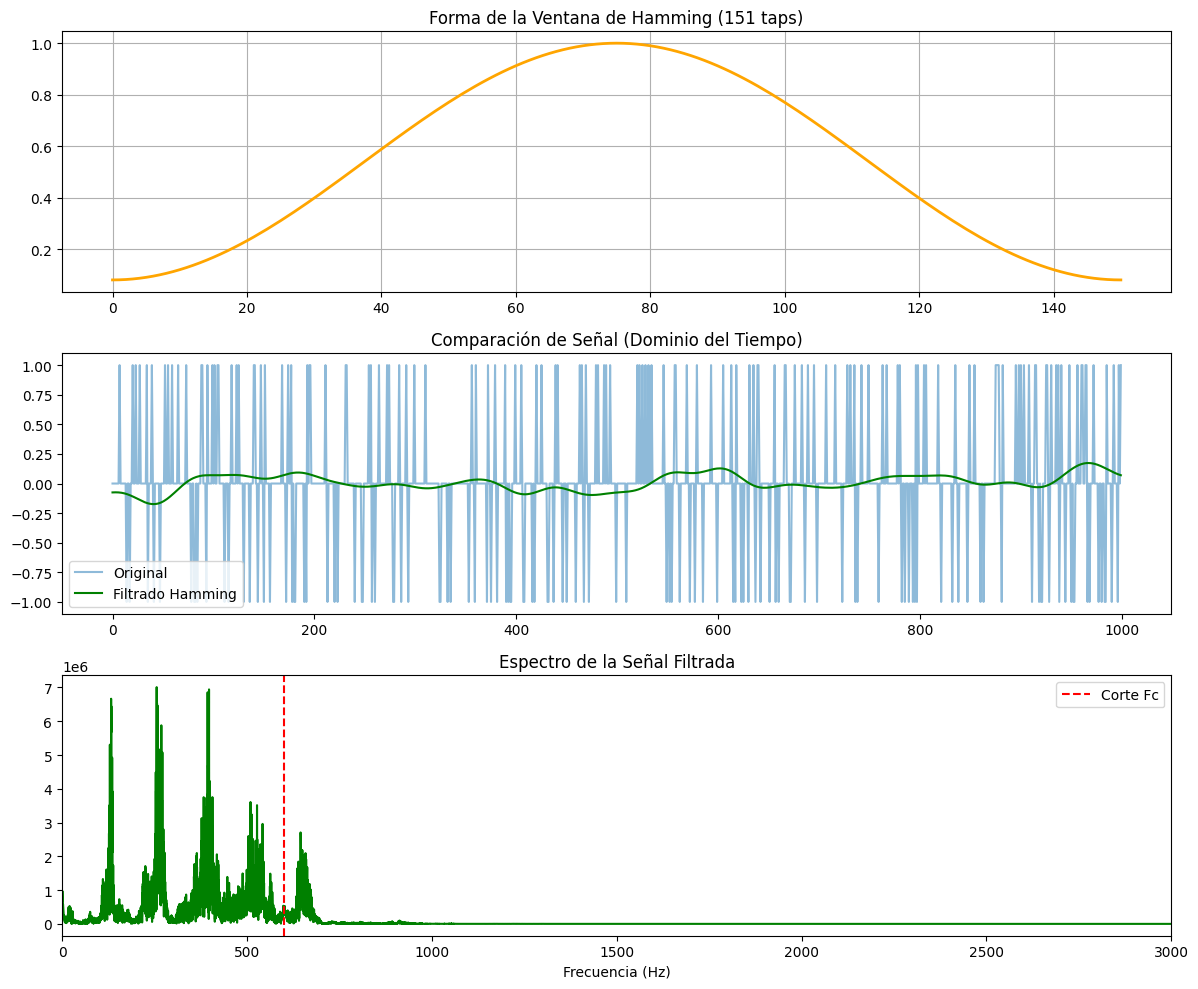

In [13]:
import numpy as np
import scipy.fftpack as fourier
from scipy.io import wavfile as waves
from scipy.signal.windows import hamming
from IPython.display import Audio, display
import matplotlib.pyplot as plt

# 1. CARGA DE DATOS
filename = 'C:/MAESTRIA/grabacion_2.wav'
Fs, data = waves.read(filename)
data_norm = data[:, 0] if len(data.shape) > 1 else data

# --- 2. DISEÑO DEL FILTRO CON VENTANA HAMMING ---
def filtro_fir_hamming(fc, fs, ntaps=101):
    nyq = 0.5 * fs
    # Aquí es donde especificamos la ventana 'hamming'
    taps = firwin(ntaps, fc/nyq, window='hamming', pass_zero='lowpass')
    return taps

# Configuración
fc = 600 
ntaps = 151
taps = filtro_fir_hamming(fc, Fs, ntaps=ntaps)

# Aplicar el filtro
audio_filtrado = lfilter(taps, 1.0, data_norm)

# --- 3. VISUALIZACIÓN DE LA VENTANA Y EL RESULTADO ---
plt.figure(figsize=(12, 10))

# Subplot 1: La forma de la Ventana Hamming
plt.subplot(3, 1, 1)
plt.plot(hamming(ntaps), color='orange', linewidth=2)
plt.title(f"Forma de la Ventana de Hamming ({ntaps} taps)")
plt.grid(True)

# Subplot 2: Comparación en el Tiempo
plt.subplot(3, 1, 2)
plt.plot(data_norm[2000:3000], label='Original', alpha=0.5)
plt.plot(audio_filtrado[2000:3000], label='Filtrado Hamming', color='green')
plt.title("Comparación de Señal (Dominio del Tiempo)")
plt.legend()

# Subplot 3: Espectro de Frecuencias
L = len(audio_filtrado)
freqs = Fs * np.arange(0, L // 2) / L
fft_res = np.abs(fourier.fft(audio_filtrado))[0:L // 2]



plt.subplot(3, 1, 3)
plt.plot(freqs, fft_res, color='green')
plt.axvline(fc, color='red', linestyle='--', label='Corte Fc')
plt.xlim(0, 3000)
plt.title("Espectro de la Señal Filtrada")
plt.xlabel("Frecuencia (Hz)")
plt.legend()
plt.tight_layout()
plt.show()

# --- 4. EXPORTACIÓN ---
ruta_hamming = 'C:/MAESTRIA/prueba_filtro_Hamming.wav'
peak = np.max(np.abs(audio_filtrado))
audio_final = (audio_filtrado / peak * 32767).astype(np.int16)
waves.write(ruta_hamming, Fs, audio_final)

display(Audio(ruta_hamming))

GRACIFA EVALUACIONES METRICAS TIPO SNR (Relacion señal ruido) Y MSE (Error cuadratico medio)

------------------------------
Métricas Filtro IIR: SNR = -5.28 dB | MSE = 562041.898704
Métricas Filtro FIR: SNR = 2.60 dB | MSE = 67148.768932
------------------------------
🏆 CONCLUSIÓN: El filtro FIR es superior en limpieza de ruido y fidelidad temporal.


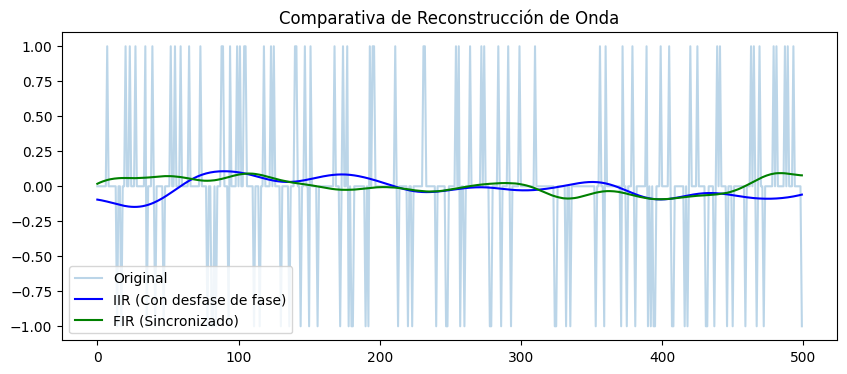

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as waves
from scipy.signal import butter, firwin, lfilter

# 1. CARGA DE DATOS
filename = 'C:/MAESTRIA/grabacion_2.wav'
Fs, data = waves.read(filename)
data_norm = data[:, 0] if len(data.shape) > 1 else data
nyq = 0.5 * Fs
fc = 500

# --- 2. APLICACIÓN DE FILTROS ---

# FILTRO IIR (Butterworth Orden 6)
b_iir, a_iir = butter(6, fc/nyq, btype='low')
audio_iir = lfilter(b_iir, a_iir, data_norm)

# FILTRO FIR (Hamming 101 taps)
ntaps = 101
taps_fir = firwin(ntaps, fc/nyq, window='hamming')
audio_fir = lfilter(taps_fir, 1.0, data_norm)

# --- 3. COMPENSACIÓN DE RETRASO (Crucial para métricas) ---
# El FIR de fase lineal tiene un retraso de (ntaps - 1) / 2 muestras
retraso = (ntaps - 1) // 2
# Sincronizamos desplazando la señal
audio_fir_sync = np.zeros_like(audio_fir)
audio_fir_sync[:-retraso] = audio_fir[retraso:]

# --- 4. CÁLCULO DE MÉTRICAS ---
def calcular_desempeño(original, filtrado):
    # En grabaciones reales, estimamos el ruido como la diferencia
    ruido_estimado = original - filtrado
    potencia_señal = np.mean(filtrado**2)
    potencia_ruido = np.mean(ruido_estimado**2)
    
    snr = 10 * np.log10(potencia_señal / potencia_ruido)
    mse = np.mean(ruido_estimado**2)
    return snr, mse

snr_iir, mse_iir = calcular_desempeño(data_norm, audio_iir)
snr_fir, mse_fir = calcular_desempeño(data_norm, audio_fir_sync)

# --- 5. RESULTADOS Y CONCLUSIÓN ---
print("-" * 30)
print(f"Métricas Filtro IIR: SNR = {snr_iir:.2f} dB | MSE = {mse_iir:.6f}")
print(f"Métricas Filtro FIR: SNR = {snr_fir:.2f} dB | MSE = {mse_fir:.6f}")
print("-" * 30)

if snr_fir > snr_iir:
    print("🏆 CONCLUSIÓN: El filtro FIR es superior en limpieza de ruido y fidelidad temporal.")
else:
    print("🏆 CONCLUSIÓN: El filtro IIR es superior en eficiencia y atenuación de banda.")

# Visualización de la diferencia de error
plt.figure(figsize=(10, 4))
plt.plot(data_norm[2000:2500], label='Original', alpha=0.3)
plt.plot(audio_iir[2000:2500], label='IIR (Con desfase de fase)', color='blue')
plt.plot(audio_fir_sync[2000:2500], label='FIR (Sincronizado)', color='green')
plt.title("Comparativa de Reconstrucción de Onda")
plt.legend()
plt.show()